Now that we have created a combined dataset with all our explanatory and response variables we can do some basic EDA before proceeding to the model creation step. Before anything lets import the libraries we will be using and import the dataset we saved in the last notebook. Then we can use the describe function to get some basic information about the data. 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('final_dataset.csv')
df

,County,Population,Firearm Homicide,Total Homicide,Firearm Suicides,Total Suicides,Poverty %,Poverty % (U18),MedHHInc,PopDen
0,"Abbeville County, SC",273649.0,13.0,22.0,43.0,51.0,14.8,21.2,"49,485",19.372405
1,"Acadia Parish, LA",684322.0,59.0,72.0,72.0,115.0,20.6,28.7,"44,648",36.872362
2,"Accomack County, VA",361441.0,33.0,43.0,31.0,55.0,16.2,25.7,"50,949",28.135968
3,"Ada County, ID",4826008.0,37.0,68.0,496.0,872.0,8.7,9.1,"79,345",163.707537
4,"Adair County, OK",244203.0,12.0,22.0,18.0,36.0,20.8,28.5,"43,371",14.882667
...,...,...,...,...,...,...,...,...,...,...
1681,"York County, SC",2796307.0,103.0,131.0,265.0,426.0,9.7,12.4,"73,466",146.710521
1682,"York County, VA",739232.0,15.0,22.0,52.0,95.0,5.1,6.1,"97,500",249.474195
1683,"Yuba County, CA",828632.0,31.0,52.0,72.0,143.0,15.6,21.9,"60,764",46.119104
1684,"Yukon-Koyukuk Census Area, AK",60314.0,NaN,14.0,19.0,33.0,23.7,32.1,"44,934",0.014362


In [31]:
df.describe(include = 'all')

,County,Population,Firearm Homicide,Total Homicide,Firearm Suicides,Total Suicides,Poverty %,Poverty % (U18),MedHHInc,PopDen
count,1686,1.686000e+03,1292.000000,1686.000000,1656.000000,1672.000000,1686.000000,1686.000000,1686,1686.000000
unique,1686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1666,NaN
top,"Abbeville County, SC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"41,281",NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
mean,NaN,1.948142e+06,108.279412,114.188612,132.206522,262.364833,15.477639,21.016311,NaN,178.100716
std,NaN,4.745557e+06,337.921033,370.260771,230.625066,508.228015,5.974551,8.725741,NaN,938.577289
min,NaN,5.039200e+04,10.000000,10.000000,10.000000,11.000000,2.900000,2.800000,NaN,0.014362
25%,NaN,3.230020e+05,15.000000,16.000000,37.000000,58.000000,11.225000,14.400000,NaN,17.491543
50%,NaN,6.634870e+05,27.000000,29.000000,68.000000,115.000000,14.700000,20.100000,NaN,36.097556
75%,NaN,1.692136e+06,65.250000,71.000000,135.000000,255.000000,18.975000,26.400000,NaN,105.338180


One thing that sticks out is MedHHInc column is actually brought over as a string instead of an int, its important we ensure that our data is in the correct datatype. 

In [32]:
df['MedHHInc'] = df['MedHHInc'].str.replace(',','')
df['MedHHInc'] = df['MedHHInc'].astype(int)

Before doing anything, lets first look at the coorelation between the differnet columns that we have. 

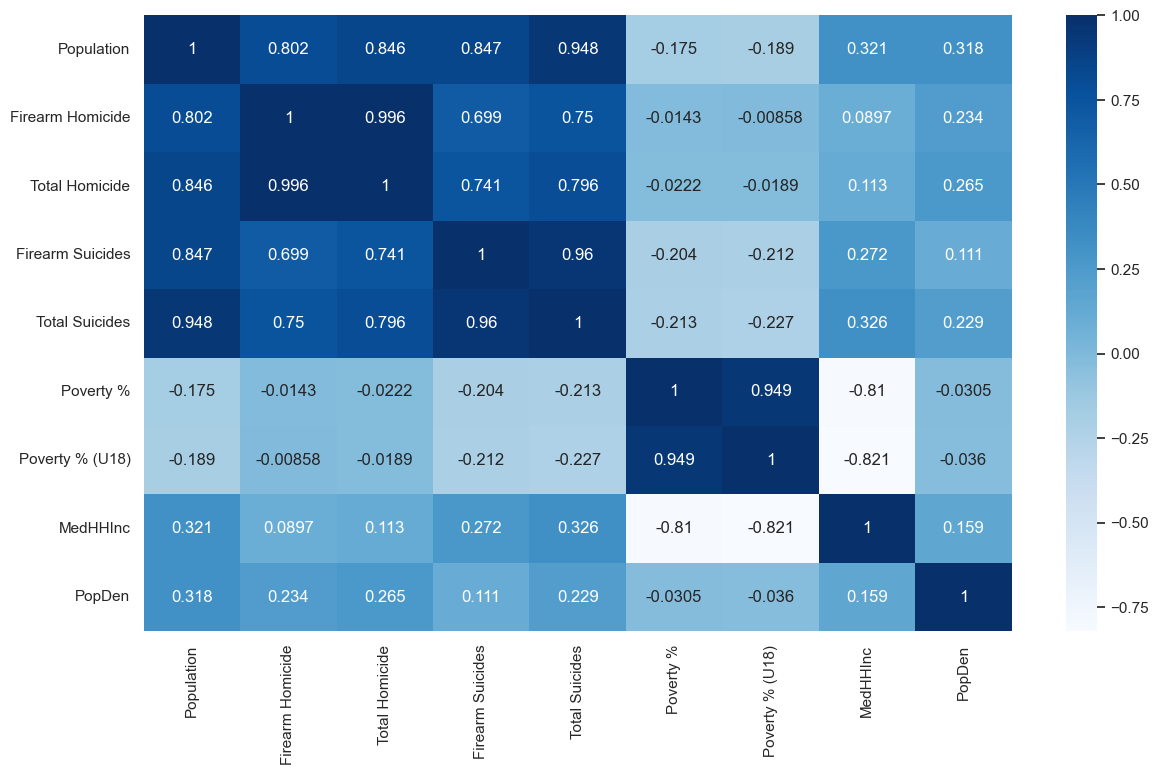

In [33]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.3g')

There are no big suprises when looking at this, although we do see some coorelation between Homoicides occuring in densly populated aread. Beside that, our counting stats coorelate strongly which eachother since areas with more people will naturally have more homocides. This is why it is important to adjust for population. 

We also see an extremely high coorelation between total homicides and firearm homicides. While a coorealtion is expected a coorealtion of .99, we can safely disregard the Homicide caused by Firearms variable and just focus on running our model on Total Homicides. 

First lets create a new variable by dividing the total homicides by population and multipying by 10000, getting homicides per 10000 residents. Then we can look at the distrubution of our new response variable. 

<AxesSubplot:>

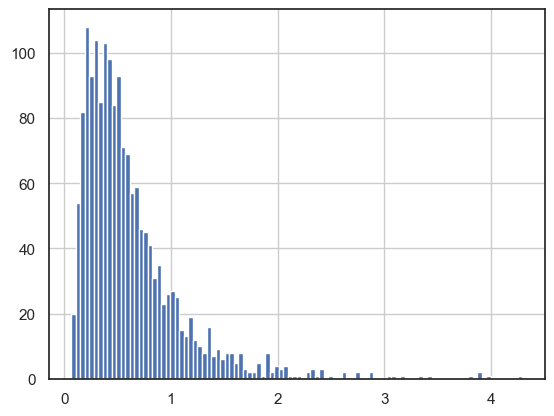

In [34]:
df['Homicide_adj'] = (df['Total Homicide']/df['Population'])*10000
df['Homicide_adj'].hist(bins = 100)

We can see the data is skewed to the right. Ideally we would want the data to follow a normal distribution (aka "Bell Curve"), one way to do that is a log transformation. 

<AxesSubplot:>

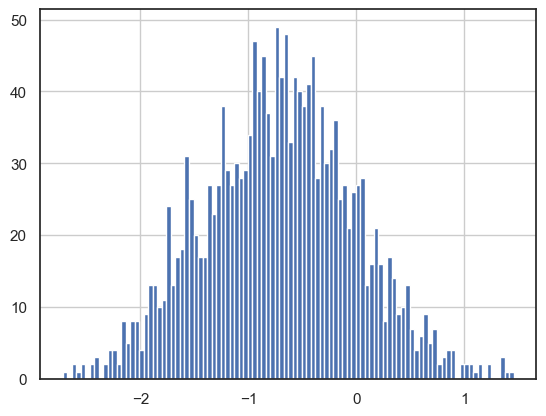

In [35]:
df['Homicide_log'] = np.log(df['Homicide_adj'])

(df['Homicide_log']).hist(bins = 100)

Next we can look at the distrubutions of the income variables. Note that there is strong coorelation between poverty and median income, so in our final model we would only want to include one of them. While both poverty and median income are skewed to the right, median income is the only one that is extreme enough to create a new variable for. 

Below that I also did a log transformation for population density, which is skewed extremely to the right. 

<AxesSubplot:>

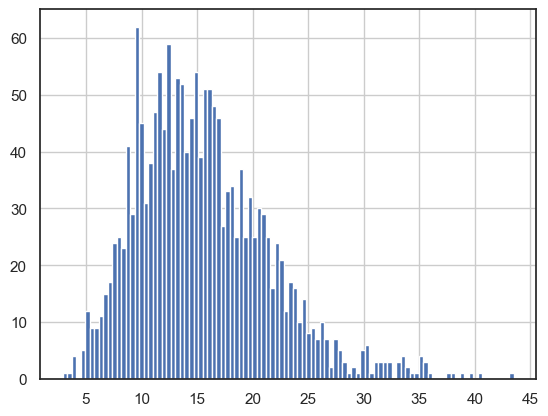

In [36]:
df['Poverty %'].hist(bins = 100)

<AxesSubplot:>

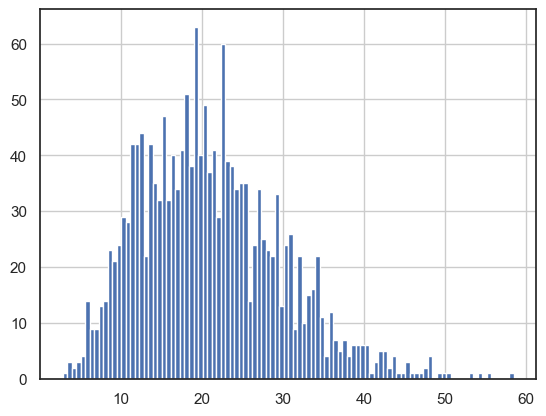

In [37]:
df['Poverty % (U18)'].hist(bins = 100)

<AxesSubplot:>

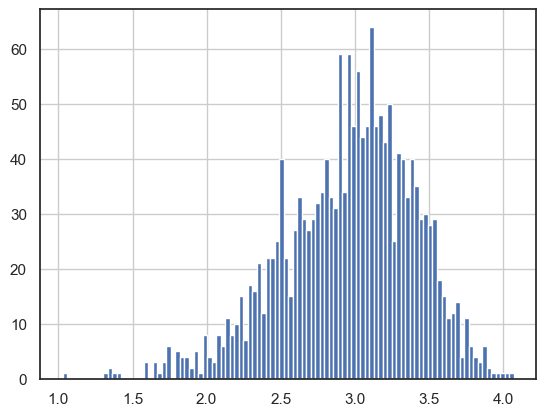

In [38]:
np.log(df['Poverty % (U18)']).hist(bins = 100)

<AxesSubplot:>

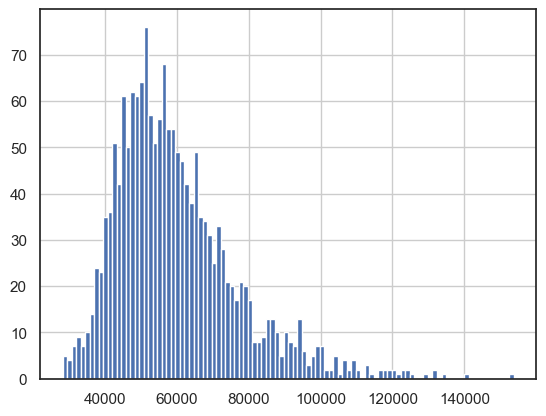

In [39]:
df['MedHHInc'].hist(bins = 100)

<AxesSubplot:>

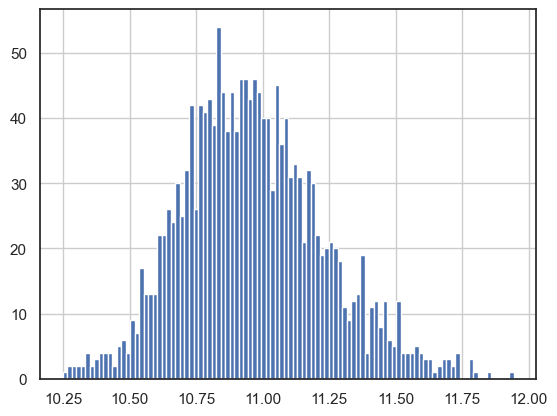

In [40]:
df['MedHHInc_log'] = np.log(df['MedHHInc']) 
df['MedHHInc_log'].hist(bins = 100)

<AxesSubplot:>

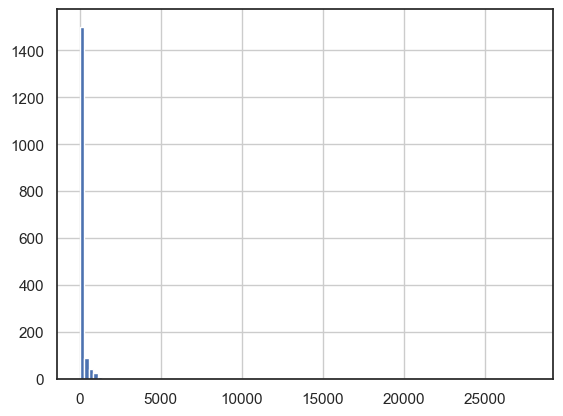

In [41]:
df['PopDen'].hist(bins = 100)

<AxesSubplot:>

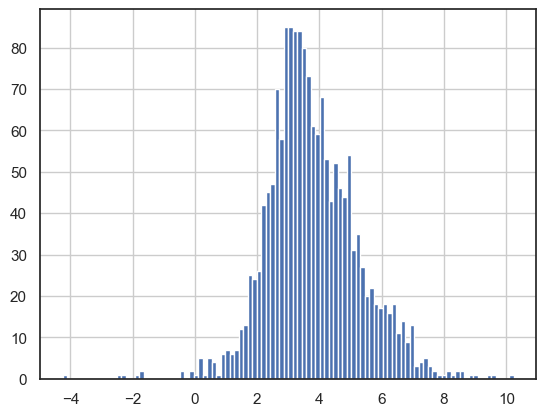

In [42]:
df['PopDen_log'] = np.log(df['PopDen'])
df['PopDen_log'].hist(bins = 100)

Finally, we will create our adjusted variables for gun ownership, in this case using the proxy of suicides by firearms. I wanted to look at two different ways to approach this proxy, the first (Firearm%) dividing the suicides by firearms by total suicides. The second (Firearms_adj) takes the suicides by firearms and divides in population (and multiply by 10000). In our final model we will most likely only include one of these variables. 

In [43]:
df['Firearms %'] = df['Firearm Suicides']/df['Total Suicides']

<AxesSubplot:>

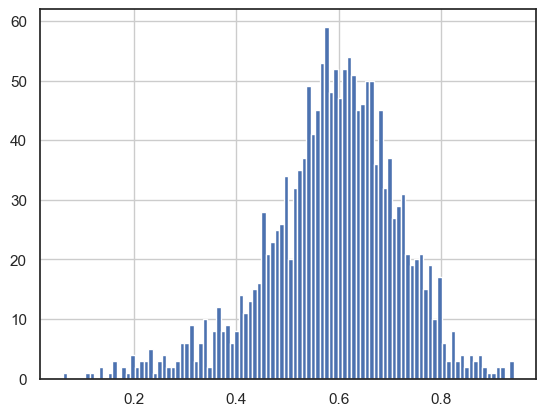

In [44]:
df['Firearms %'].hist(bins = 100)

In [45]:
df['Firearms_adj'] = (df['Firearm Suicides']/df['Population']) * 10000

<AxesSubplot:>

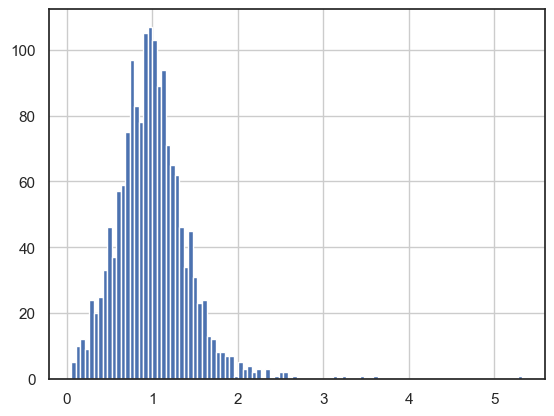

In [46]:
df['Firearms_adj'].hist(bins = 100)

Finally, we can look at our coorelation coefficent again with some of our newly generated variables. To keep the visual looking clean, I have excluded some of the columns. 

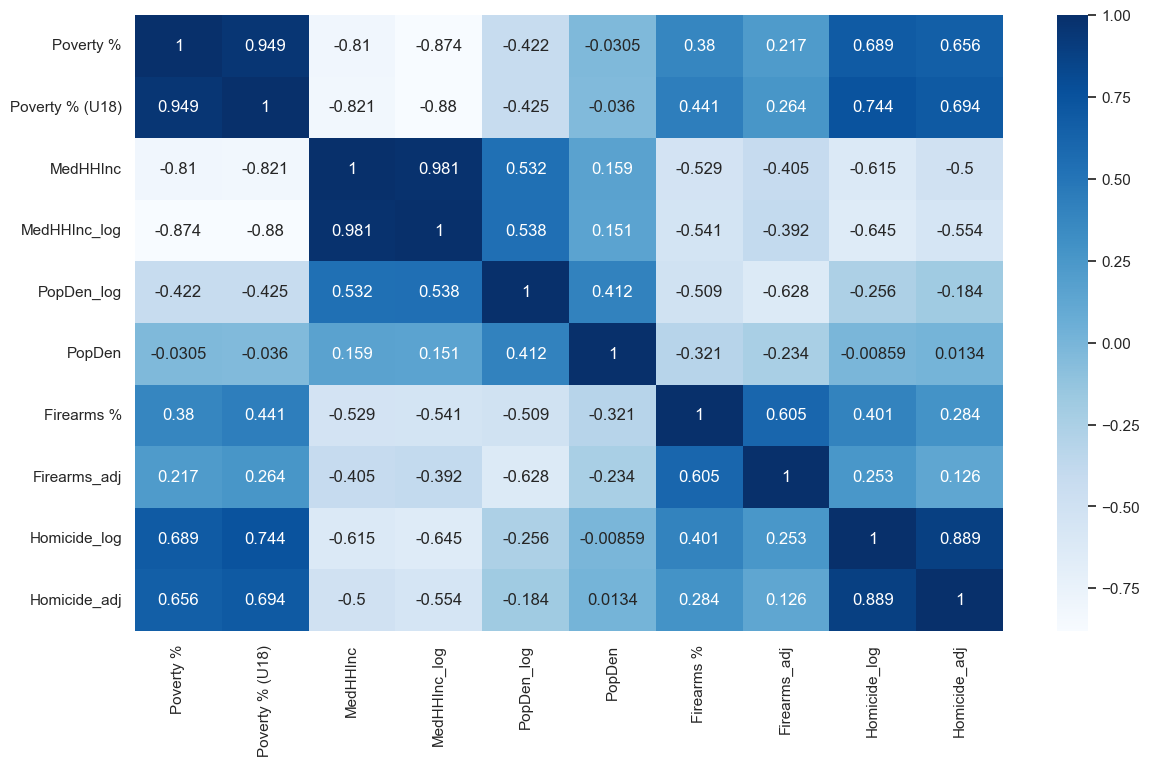

In [47]:
df_adj = df[['County','Poverty %','Poverty % (U18)',
             'MedHHInc','MedHHInc_log','PopDen_log','PopDen','Firearms %','Firearms_adj','Homicide_log','Homicide_adj']]

plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df_adj.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.3g')

In [48]:
#df_adj = df_adj.rename(columns = {'Homicide_log':'Homicide','PopDen_log':'PopDen'})
df_adj.to_csv('adjusted_data.csv', index = False)

Now we can move onto the next step, which is creating our model with our newly created variables. 